## PROJECT USING SCORE CARD DATASET

### In this Problem Set, I intend to use the Department of Education Scorecard datasets to perform analysis and prediction on the determinants/ features influencing the fact that a university has a high (vs low) repayment / default rate on debt. 

#### The data are from 1997 to 2014 and are at the university level, but when exploring all the data in excel, most of them are missing columns, except the years 2012-2013 where most of the data were collected.

So I will merge all the data from 1997 to 2014, but only use a subset of data from 2012-2013 for my predictive analysis

## The links for datasets, data dictionnary, and documentation are below:
https://collegescorecard.ed.gov/data/

https://collegescorecard.ed.gov/data/documentation/

In [1]:

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import pickle as pkl

import matplotlib
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'retina'
%matplotlib inline



# plt.style.use('fivethirtyeight')
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', 300)
# pd.set_option('display.width', 300)

In [2]:
df='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv'
df= pd.read_csv(df)
df['year']=1997

df1='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv'
df1= pd.read_csv(df1)
df1['year']=1998

df2='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv'
df2= pd.read_csv(df2)
df2['year']=1999

df3='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv'
df3= pd.read_csv(df3)
df3['year']=2000

df4='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv'
df4= pd.read_csv(df4)
df4['year']=2001

df5='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv'
df5= pd.read_csv(df5)
df5['year']=2002

df6='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv'
df6= pd.read_csv(df6)
df6['year']=2003

df7='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv'
df7= pd.read_csv(df7)
df7['year']=2004

df8='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv'
df8= pd.read_csv(df8)
df8['year']=2005

df9='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv'
df9= pd.read_csv(df9)
df9['year']=2006

df10='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv'
df10= pd.read_csv(df10)
df10['year']=2007

df11='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv'
df11= pd.read_csv(df11)
df11['year']=2008

df12='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv'
df12= pd.read_csv(df12)
df12['year']=2009

df13='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv'
df13= pd.read_csv(df13)
df13['year']=2010

df14='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv'
df14= pd.read_csv(df14)
df14['year']=2011

df15='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv'
df15= pd.read_csv(df15)
df15['year']=2012

df16='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv'
df16= pd.read_csv(df16)
df16['year']=2013

df17='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/Project_number2/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv'
df17= pd.read_csv(df17)
df17['year']=2014



C:\Users\mjors_000\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\mjors_000\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,6,442,451,598,607,611,620,624,633,789,802,806,815,893,906,971,984,997,1153,1166,1407,1408,1411,1425,1431,1432,1433,1437,1438,1439,1440,1445,1446,1447,1451,1452,1453,1454,1459,1460,1461,1465,1466,1467,1468,1473,1474,1475,1479,1480,1481,1482,1487,1488,1489,1501,1502,1537,1538,1539,1540,1541,1542,1603,1606,1609,1610,1611,1613,1614,1615,1616,1688,1689,1690,1691,1692,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\mjors_000\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,1729) have mixed 

In [7]:
df.shape

(6794, 1744)

In [3]:
#http://stackoverflow.com/questions/28135436/concatenate-two-dataframes-in-pandas
#http://pandas.pydata.org/pandas-docs/stable/merging.html

df18= pd.concat([df, df1, df2, df3, df4, df5, df6, df7, ])
df19= pd.concat([ df8, df9, df10, df11, df12, df13, df14, df15, df16, df17])
df19.head(2)

UNITID     OPEID  OPEID6                               INSTNM        CITY  \
0  100654  00100200    1002             Alabama A & M University      Normal   
1  100663  00105200    1052  University of Alabama at Birmingham  Birmingham   

  STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  ...    TRANS_4  DTRANS_4  \
0     AL       35762           NaN      NaN     NaN  ...   0.000000     995.0   
1     AL  35294-0110           NaN      NaN     NaN  ...   0.225836    1076.0   

   TRANS_L4  DTRANS_L4  ICLEVEL  UGDS_MEN  UGDS_WOMEN  CDR3_DENOM  CDR2_DENOM  \
0       NaN        NaN      1.0    0.4776      0.5224         NaN      1602.0   
1       NaN        NaN      1.0    0.3876      0.6124         NaN      2468.0   

   year  
0  2005  
1  2005  

[2 rows x 1744 columns]

In [4]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72032 entries, 0 to 7803
Columns: 1744 entries, UNITID to year
dtypes: float64(456), int64(7), object(1281)
memory usage: 959.0+ MB


In [5]:
#After I displayed all columns, there were too many columns with all missing values
#Removing all columns / all rows that only contains missing values NAs
#https://chrisalbon.com/python/pandas_missing_data.html

df20=df19.dropna(axis=1, how='all')
#df20=df0.dropna(axis=0, how='all')
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72032 entries, 0 to 7803
Columns: 1690 entries, UNITID to year
dtypes: float64(402), int64(7), object(1281)
memory usage: 929.3+ MB


In [9]:
#subset data 2012-2013
df1213= df20[(df20['year'] == 2012) |(df20['year'] == 2013)]

I reduced my data for only 2012 and 2013 because there are so many missing columns for the years before that I cannot really use to investigate the real determinants of repayment rate. and mny data were collected in 2012-2013

In [ ]:
#To merge my new dataset and use it from now on 
df1213.to_csv('merged1213.csv') 

In [2]:
df1213=pd.read_csv('C:/Users/mjors_000/Desktop/ECON628-01-berenger92/merged1213.csv', na_values=['PrivacySuppressed'])
df1213.head(2)

C:\Users\mjors_000\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  UNITID   OPEID  OPEID6                    INSTNM    CITY  \
0           0  100654  100200    1002  Alabama A & M University  Normal   
1           0  100654  100200    1002  Alabama A & M University  Normal   

  STABBR    ZIP  SCH_DEG  MAIN  ...     MD_FAMINC    FAMINC_IND  \
0     AL  35762      3.0     1  ...   25083.92967  11503.123113   
1     AL  35762      3.0     1  ...   22681.34069  10024.501666   

   DEBT_MDN_SUPP  GRAD_DEBT_MDN_SUPP  GRAD_DEBT_MDN10YR_SUPP  ICLEVEL  \
0        12745.0             27435.0              281.562947      1.0   
1        14250.0             30000.0              307.887312      1.0   

   UGDS_MEN  UGDS_WOMEN  CDR2_DENOM  year  
0    0.4786      0.5214      1438.0  2012  
1    0.4879      0.5121      1574.0  2013  

[2 rows x 1321 columns]

The reason why I imported my restricted data and specified PrivacySuppressed as missing values is because the values are missing for those cells.

In [4]:
df1213.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15468 entries, 0 to 15467
Columns: 1321 entries, Unnamed: 0 to year
dtypes: float64(1306), int64(9), object(6)
memory usage: 155.9+ MB


In [5]:
df1213.isnull().sum()

Unnamed: 0                   0
UNITID                       0
OPEID                        0
OPEID6                       0
INSTNM                       0
CITY                         0
STABBR                       0
ZIP                          0
SCH_DEG                    172
MAIN                         0
NUMBRANCH                    0
PREDDEG                      0
HIGHDEG                      0
CONTROL                      0
ST_FIPS                      1
REGION                       1
PCIP01                    1335
PCIP03                    1335
PCIP04                    1335
PCIP05                    1335
PCIP09                    1335
PCIP10                    1335
PCIP11                    1335
PCIP12                    1335
PCIP13                    1335
                          ... 
PAR_ED_N                  1922
APPL_SCH_N                 559
REPAY_DT_MDN              6693
SEPAR_DT_MDN              3381
REPAY_DT_N                5897
SEPAR_DT_N                3332
LOAN_EVE

In [5]:
#  command that will convert back all the objects types as float

# http://stackoverflow.com/questions/32792955/pandas-how-to-convert-all-the-string-value-to-float
#dt1213 = df1213.convert_objects(convert_numeric=True)

#http://stackoverflow.com/questions/15891038/pandas-change-data-type-of-columns
df1213= df1213.apply(pd.to_numeric, errors='ignore')
df1213.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15468 entries, 0 to 15467
Columns: 1321 entries, Unnamed: 0 to year
dtypes: float64(1306), int64(9), object(6)
memory usage: 155.9+ MB


The last command is better than the first, because, although the first *df1213.convert_objects(convert_numeric=True)*
converts back columns to float, it convert to NaN observations where there are erros in conversion.
While the second one is better because the option *errors='ignore'* allows to skip columns where some observations are posing difficulties.

In [3]:
#I set the threshold at 10000 non missing observations, since the dataset has 15468 observations
data2= df1213.dropna(thresh=10000, axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15468 entries, 0 to 15467
Columns: 412 entries, Unnamed: 0 to year
dtypes: float64(398), int64(9), object(5)
memory usage: 48.6+ MB


I did the dropping because I believe a column that has 10000 or more missing observations is not really useful.

In [11]:
data2.isnull().sum()

Unnamed: 0                   0
UNITID                       0
OPEID                        0
OPEID6                       0
INSTNM                       0
CITY                         0
STABBR                       0
ZIP                          0
SCH_DEG                    172
MAIN                         0
NUMBRANCH                    0
PREDDEG                      0
HIGHDEG                      0
CONTROL                      0
ST_FIPS                      1
REGION                       1
PCIP01                    1335
PCIP03                    1335
PCIP04                    1335
PCIP05                    1335
PCIP09                    1335
PCIP10                    1335
PCIP11                    1335
PCIP12                    1335
PCIP13                    1335
PCIP14                    1335
PCIP15                    1335
PCIP16                    1335
PCIP19                    1335
PCIP22                    1335
                          ... 
CUML_DEBT_P90             3491
CUML_DEB

In [4]:
data2= data2.dropna(axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5799 entries, 0 to 14774
Columns: 412 entries, Unnamed: 0 to year
dtypes: float64(398), int64(9), object(5)
memory usage: 18.3+ MB


The reason why I drop at this stage is because most of the missing data are missing for both 2012 and 2013 for all columns, so it is not possible to replace one missing value of one year by that of another.
Also, I do not want to replace missing values by 0 or by the mean of groups, because data are speific to each university, and it will be inaccurate to replace by the mean of a group, or by 0.

In [13]:
#Here I am saving a smaller version of my dataset after dropping all missing observations.
data2.to_csv('merged1213best.csv')

In [19]:
data2.sort(['UNITID', 'year'], ascending=True, inplace=True)
data2.head(6)

C:\Users\mjors_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Unnamed: 0  UNITID   OPEID  OPEID6                               INSTNM        CITY STABBR         ZIP  SCH_DEG  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  PCIP14  PCIP15  PCIP16  PCIP19  PCIP22  PCIP23  \
0           0  100654  100200    1002             Alabama A & M University      Normal     AL       35762      3.0     1          1        3        4      1.0      1.0     5.0  0.0388  0.0145  0.0129   0.000  0.0000  0.0517  0.0258     0.0  0.1438  0.0856  0.0404  0.0000  0.0291     0.0  0.0162   
1           0  100654  100200    1002             Alabama A & M University      Normal     AL       35762      3.0     1          1        3        4      1.0      1.0     5.0  0.0451  0.0150  0.0075   0.000  0.0000  0.0226  0.0301     0.0  0.1203  0.1372  0.0395  0.0000  0.0414     0.0  0.0094   
2           1  100663  105200    1052  University of Alabama at Birmingham  Birmingham     AL  35294-0110      3.0     1          1        3        4      1.0      1.0     5.0  0.0000  0.0000  0.0000   0.002  0.0427  0.0000  0.0139     0.0  0.0780  0.0551  0.0000  0.0124  0.0000     0.0  0.0223   
3           1  100663  105200    1052  University of Alabama at Birmingham  Birmingham     AL  35294-0110      3.0     1          1        3        4      1.0      1.0     5.0  0.0000  0.0000  0.0000   0.002  0.0418  0.0000  0.0090     0.0  0.0697  0.0578  0.0000  0.0110  0.0000     0.0  0.0269   
6           3  100706  105500    1055  University of Alabama in Huntsville  Huntsville     AL       35899      3.0     1          1        3        4      1.0      1.0     5.0  0.0000  0.0000  0.0000   0.000  0.0224  0.0000  0.0292     0.0  0.0214  0.2471  0.0000  0.0224  0.0000     0.0  0.0204   
7           3  100706  105500    1055  University of Alabama in Huntsville  Huntsville     AL       35899      3.0     1          1        3        4      1.0      1.0     5.0  0.0000  0.0000  0.0000   0.000  0.0120  0.0000  0.0249     0.0  0.0148  0.2648  0.0000  0.0166  0.0000     0.0  0.0249   

   PCIP24  PCIP25  PCIP26  PCIP27  PCIP29  PCIP30  PCIP31  PCIP38  PCIP39  PCIP40  PCIP41  PCIP42  PCIP43  PCIP44  PCIP45  PCIP46  PCIP47  PCIP48  PCIP49  PCIP50  PCIP51  PCIP52  PCIP54  CIP01CERT1  CIP01CERT2  CIP01ASSOC  CIP01CERT4  CIP01BACHL  CIP03CERT1  CIP03CERT2  CIP03ASSOC  CIP03CERT4  \
0  0.0210     0.0  0.0985  0.0162     0.0     0.0     0.0  0.0000     0.0  0.0226     0.0  0.0630  0.0000  0.0646  0.0485     0.0     0.0     0.0     0.0  0.0162  0.0000  0.1906  0.0000         0.0         0.0         0.0         0.0         1.0         0.0         0.0         0.0         0.0   
1  0.0282     0.0  0.1015  0.0075     0.0     0.0     0.0  0.0000     0.0  0.0150     0.0  0.0564  0.0000  0.0301  0.0695     0.0     0.0     0.0     0.0  0.0075  0.0000  0.2162  0.0000         0.0         0.0         0.0         0.0         1.0         0.0         0.0         0.0         0.0   
2  0.0060     0.0  0.0819  0.0094     0.0     0.0     0.0  0.0154     0.0  0.0184     0.0  0.0641  0.0323  0.0149  0.0447     0.0     0.0     0.0     0.0  0.0417  0.2334  0.1822  0.0293         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0   
3  0.0184     0.0  0.0722  0.0159     0.0     0.0     0.0  0.0060     0.0  0.0184     0.0  0.0837  0.0314  0.0244  0.0483     0.0     0.0     0.0     0.0  0.0398  0.2261  0.1678  0.0294         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0   
6  0.0000     0.0  0.0652  0.0146     0.0     0.0     0.0  0.0117     0.0  0.0311     0.0  0.0331  0.0000  0.0000  0.0175     0.0     0.0     0.0     0.0  0.0360  0.1819  0.2325  0.0136         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0   
7  0.0000     0.0  0.0710  0.0175     0.0     0.0     0.0  0.0111     0.0  0.0203     0.0  0.0221  0.0000  0.0000  0.0157     0

## Outliers

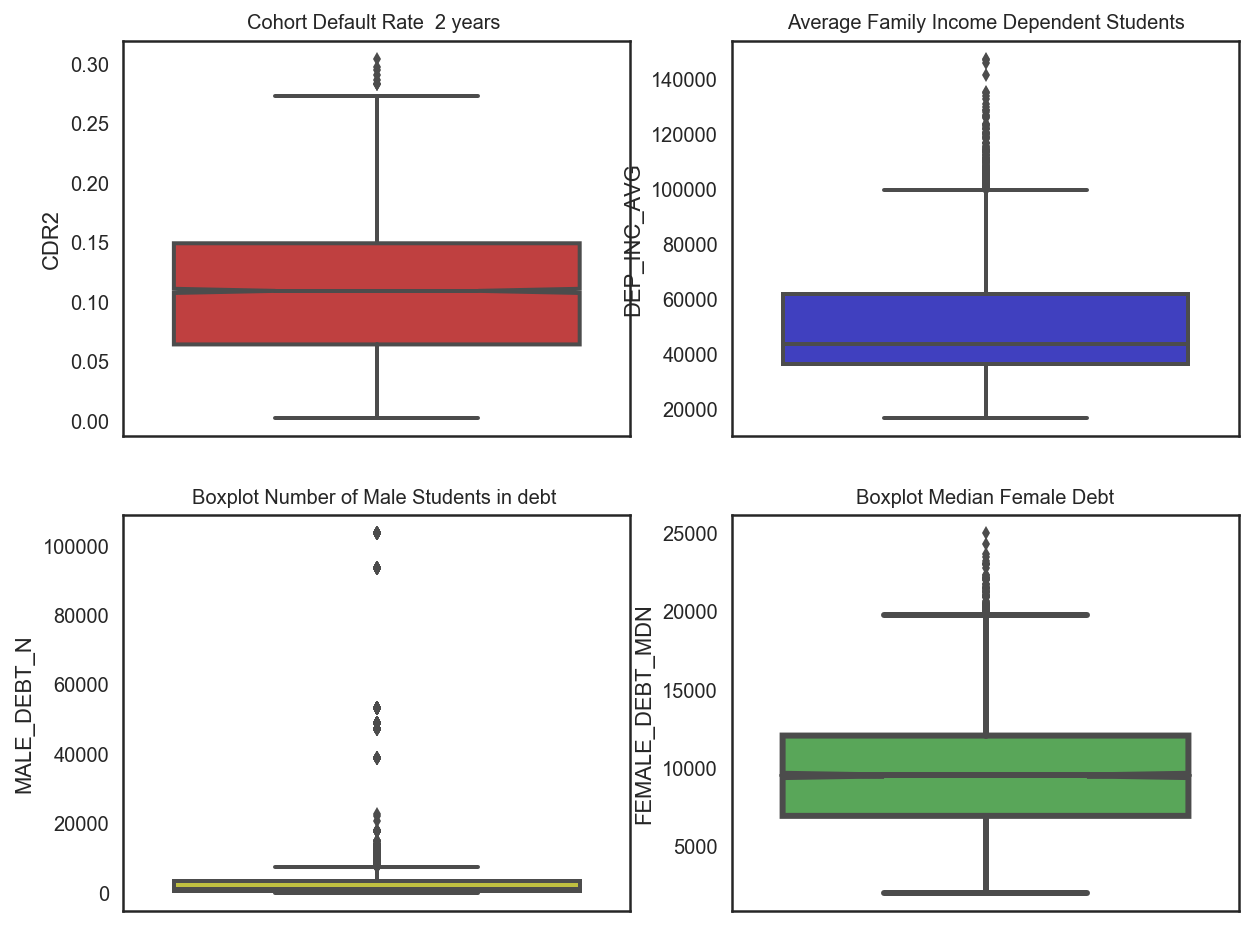

In [16]:
#First plotting boxplots to check some outliers for main variables
sns.set(rc={"figure.figsize": (10, 8)})
sns.set_style('white')
    
fig, axarr = plt.subplots(2, 2, figsize=(10,8),
                         sharex=False, sharey=False)
axarr[0,0] = sns.boxplot(data2['CDR2'], orient='v',
             linewidth=2, notch=True, 
            saturation=0.5, ax=axarr[0,0], color="red")
axarr[0,0].set_title('Cohort Default Rate  2 years ', fontsize=10)
    
axarr[0,1] = sns.boxplot(data2['DEP_INC_AVG'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[0,1], color="blue")
axarr[0,1].set_title('Average Family Income Dependent Students', fontsize=10)
    
axarr[1,0] = sns.boxplot(data2['MALE_DEBT_N'], orient='v',
             linewidth=2, notch=False, 
            saturation=0.5, ax=axarr[1,0], color="yellow")
axarr[1,0].set_title('Boxplot Number of Male Students in debt ', fontsize=10)
    
axarr[1,1] = sns.boxplot(data2['FEMALE_DEBT_MDN'], orient='v',
             linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[1,1], color="limegreen")
axarr[1,1].set_title('Boxplot Median Female Debt',  fontsize=10)

#### Removing Outliers

In [12]:
#Remove outliers: To do that we only need numeric values, so we will create a new dataset containing only float and integer types

#http://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html

from scipy import stats
data1= data2.select_dtypes(include=['float64', 'int64'], exclude=['object'])

#Both commands below produce the same result bu removing outliers in each column 3 standard deviation above and below the mean.

data1[(np.abs(stats.zscore(data1)) < 3).all(axis=1)]

data1[data1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5799 entries, 0 to 14774
Columns: 407 entries, Unnamed: 0 to year
dtypes: float64(398), int64(9)
memory usage: 18.1 MB


## Checking relations among variables

### Defining subsets of my data for heatmap

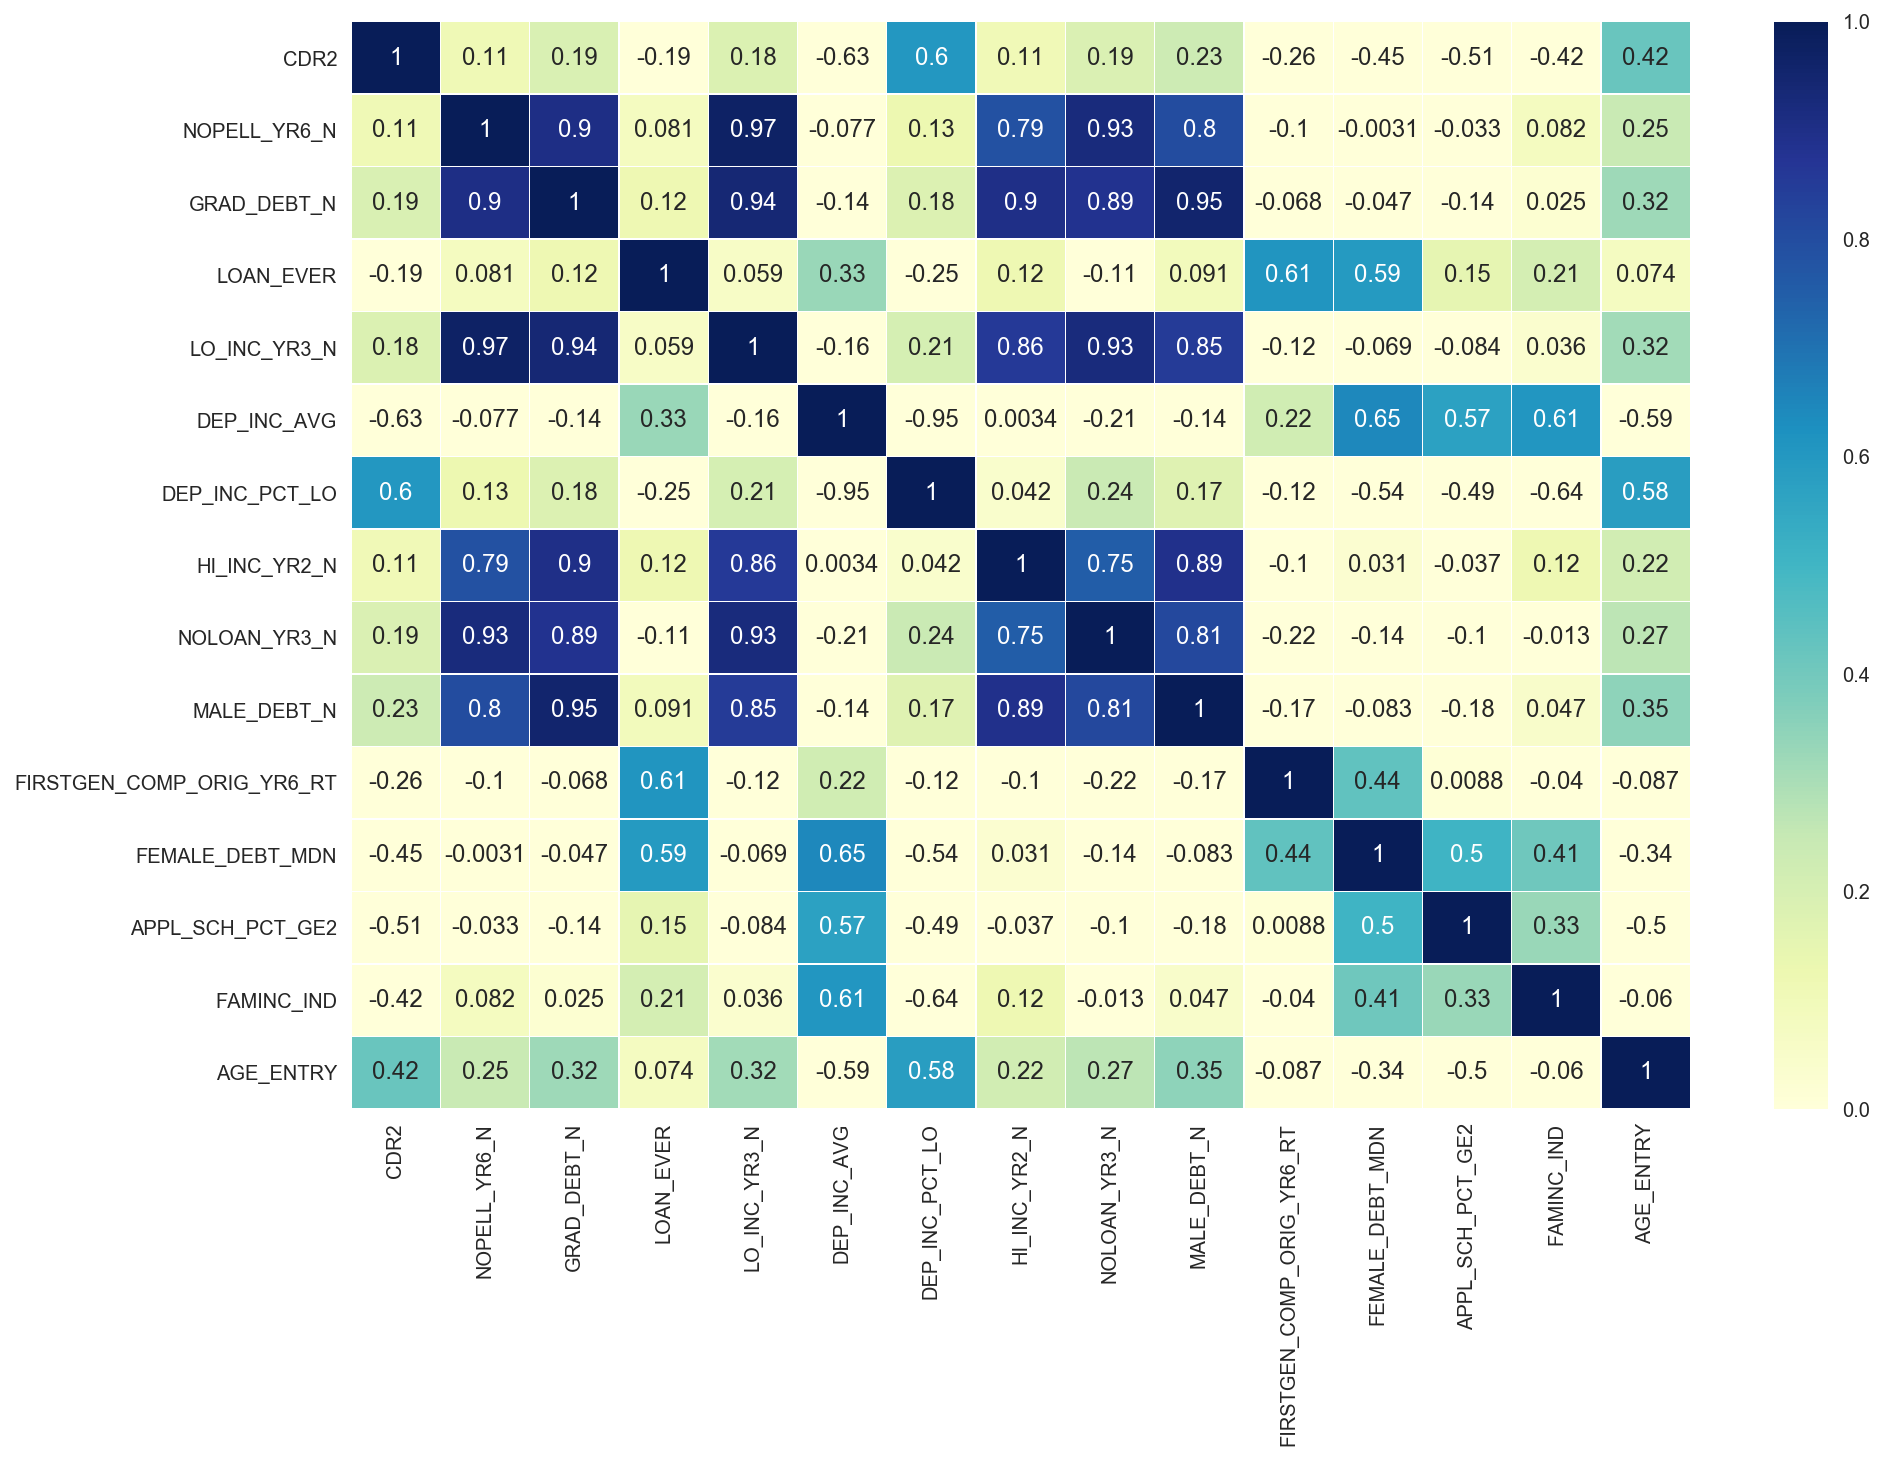

In [14]:
dt = pd.DataFrame(data1, columns=['CDR2', 'NOPELL_YR6_N', 'GRAD_DEBT_N', 'LOAN_EVER', 'LO_INC_YR3_N', 'DEP_INC_AVG', 'DEP_INC_PCT_LO', 
'HI_INC_YR2_N', 'NOLOAN_YR3_N', 'MALE_DEBT_N', 'FIRSTGEN_COMP_ORIG_YR6_RT', 'FEMALE_DEBT_MDN',  'APPL_SCH_PCT_GE2', 'FAMINC_IND', 'AGE_ENTRY' ] )

fig = plt.figure(figsize=(15,10))
ax = fig.gca()
sns.heatmap(dt.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()


We can see that we have correlations among some of the main variables.

In [15]:
dt.describe().T

count          mean           std           min  \
CDR2                       5799.0      0.110460      0.054381      0.002000   
NOPELL_YR6_N               5799.0   1712.396103   6385.556671     12.000000   
GRAD_DEBT_N                5799.0   5513.565270  13720.750848     32.000000   
LOAN_EVER                  5799.0      0.805833      0.187951      0.025856   
LO_INC_YR3_N               5799.0   6624.222107  24956.502124     61.000000   
DEP_INC_AVG                5799.0  50471.756700  20520.464257  16621.733849   
DEP_INC_PCT_LO             5799.0      0.475539      0.160720      0.088257   
HI_INC_YR2_N               5799.0    942.665632   2259.751383     10.000000   
NOLOAN_YR3_N               5799.0   1000.091740   2736.887600     10.000000   
MALE_DEBT_N                5799.0   7003.126229  18439.647206     30.000000   
FIRSTGEN_COMP_ORIG_YR6_RT  5799.0      0.397137      0.199695      0.018341   
FEMALE_DEBT_MDN            5799.0   9860.258320   4057.839012   2000.000000   
APPL_SCH_PCT_GE2           5799.0      0.430628      0.135374      0.098463   
FAMINC_IND                 5799.0  21409.660635   7370.807592   7108.542280   
AGE_ENTRY                  5799.0     26.473399      3.317395     19.804987   

                                    25%           50%           75%  \
CDR2                           0.064000      0.109000      0.149000   
NOPELL_YR6_N                 161.000000    370.000000    877.500000   
GRAD_DEBT_N                  604.500000   1451.000000   3698.000000   
LOAN_EVER                      0.792938      0.876910      0.918687   
LO_INC_YR3_N                 557.000000   1191.000000   2895.000000   
DEP_INC_AVG                36267.197095  43537.488402  61706.727853   
DEP_INC_PCT_LO                 0.344730      0.509194      0.596436   
HI_INC_YR2_N                  90.000000    270.000000    691.500000   
NOLOAN_YR3_N                  87.000000    266.000000    652.500000   
MALE_DEBT_N                  534.000000   1104.000000   3260.000000   
FIRSTGEN_COMP_ORIG_YR6_RT      0.240418      0.382353      0.564021   
FEMALE_DEBT_MDN             6912.750000   9500.000000  12051.250000   
APPL_SCH_PCT_GE2               0.332712      0.409216      0.514177   
FAMINC_IND                 16790.393944  20345.858831  24268.306869   
AGE_ENTRY                     24.027684     26.490864     29.163605   

                                     max  
CDR2                            0.304000  
NOPELL_YR6_N                48754.000000  
GRAD_DEBT_N                 85051.000000  
LOAN_EVER                       0.993045  
LO_INC_YR3_N               167522.000000  
DEP_INC_AVG                147408.758810  
DEP_INC_PCT_LO                  0.858116  
HI_INC_YR2_N                16677.000000  
NOLOAN_YR3_N                20690.000000  
MALE_DEBT_N                103547.000000  
FIRSTGEN_COMP_ORIG_YR6_RT       0.867188  
FEMALE_DEBT_MDN             25000.000000  
APPL_SCH_PCT_GE2                0.902830  
FAMINC_IND                  68242.250895  
AGE_ENTRY                      38.634334

In [8]:
# https://altair-viz.github.io/documentation/encoding.html
# https://altair-viz.github.io/tutorials/exploring-weather.html

from altair import *
from altair import Chart
Chart(data2).mark_point().encode(
    X('FAMINC:Q', axis=Axis(title='Family income')),
    Y('CDR2:Q', axis=Axis(title='Cohort Default rate 2years')),
    Color('CONTROL:N'),

)

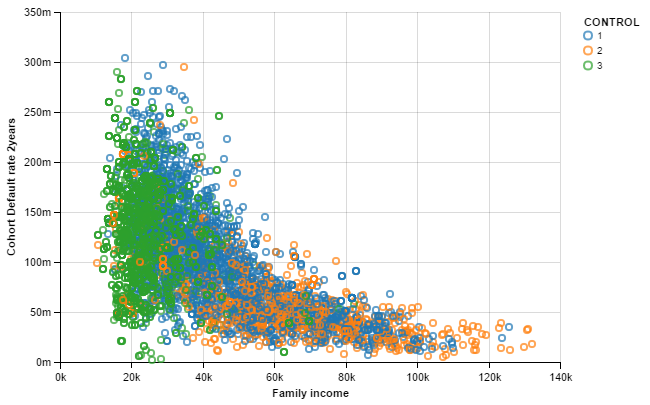

In [13]:
# First I ran the command and I export the picture in png format
#The reason is because leaving the output enormously increases the size of the notebook, making it impossible to push it on github

#http://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown
from IPython.display import Image
Image(filename='vega.png')

The graph above describes the raltion between family income at the university and the percentage of default rate on debt two year after graduation, by type of ownership
The variable CONTROL is ownsership: 1 = public 2 = private non profit, 3 = private for profit.
As we can notice, universities that enroll students from families with high income, have low default rate on debt, which seems normal because high income families/students can easily afford to pay-off the debt. 

In [9]:
#http://pandas.pydata.org/pandas-docs/stable/categorical.html
data2['type_degree']= data2["HIGHDEG"].astype('category')
data2['type_degree']= data2['type_degree'].cat.rename_categories(['Non-degree-granting','Certificate degree','Associate degree','Bachelors degree', 'Graduate degree'])
data2.head(2)

Unnamed: 0  UNITID   OPEID  OPEID6                    INSTNM    CITY  \
0           0  100654  100200    1002  Alabama A & M University  Normal   
1           0  100654  100200    1002  Alabama A & M University  Normal   

  STABBR    ZIP  SCH_DEG  MAIN       ...           FAMINC_IND  DEBT_MDN_SUPP  \
0     AL  35762      3.0     1       ...         11503.123113        12745.0   
1     AL  35762      3.0     1       ...         10024.501666        14250.0   

   GRAD_DEBT_MDN_SUPP  GRAD_DEBT_MDN10YR_SUPP  ICLEVEL  UGDS_MEN  UGDS_WOMEN  \
0             27435.0              281.562947      1.0    0.4786      0.5214   
1             30000.0              307.887312      1.0    0.4879      0.5121   

   CDR2_DENOM  year      type_degree  
0      1438.0  2012  Graduate degree  
1      1574.0  2013  Graduate degree  

[2 rows x 413 columns]

In [10]:
from altair import *
from altair import Chart
Chart(data2).mark_point().encode(
    X('FAMINC:Q', axis=Axis(title='Family income')),
    Y('CDR2:Q', axis=Axis(title='Cohort Default rate 2years')),
    Color('type_degree'),

)

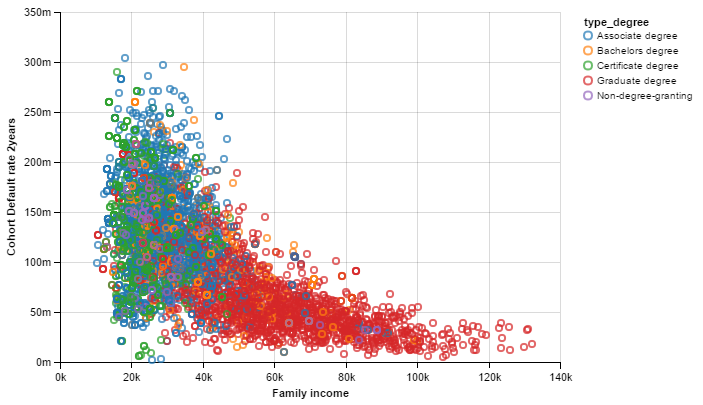

In [15]:
Image(filename='vega (1).png')

We can either visualize the graph above or the one below. The results show a pattern.

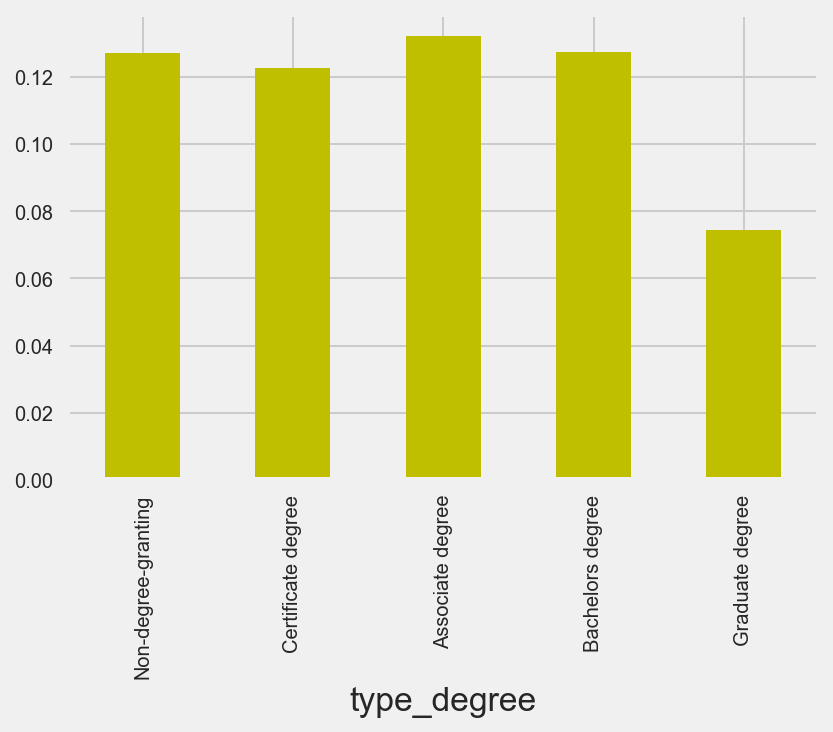

In [15]:

data2.groupby(['type_degree'])['CDR2'].mean().plot(kind="bar", color='y')
plt.show()



We can see that the type of Universities that have a low default rate are Univsersities that grant graduate degree, and most of them enroll students from families that have high income/rich. This can be explain by the fact that students in those types of universities might end up with a graduate degree, and therefore have high paid jobs, and therefore are more able to pay back their loans.

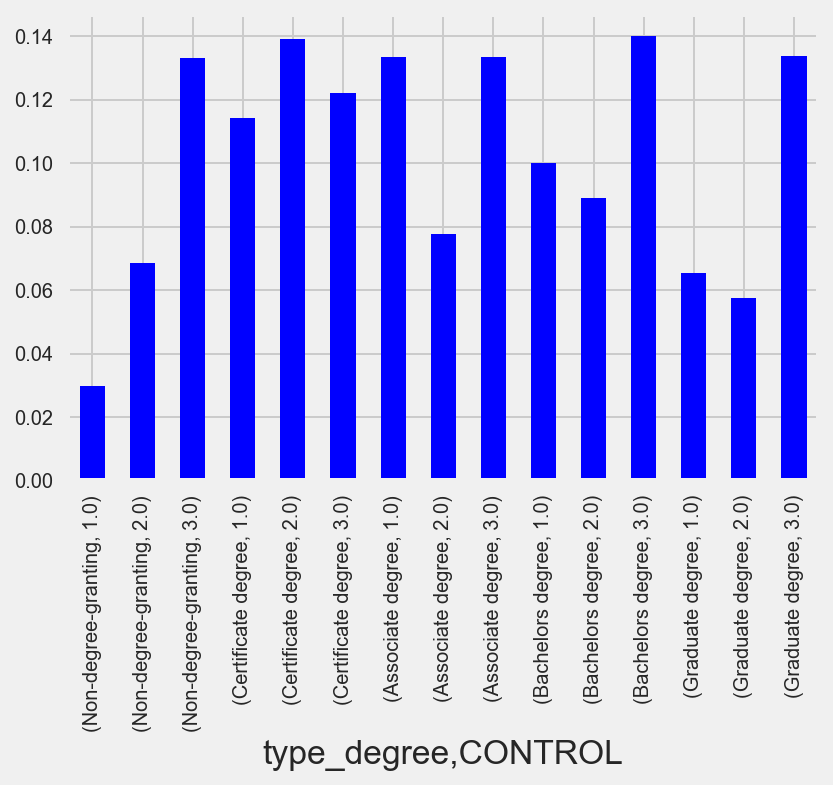

In [16]:
# fig = plt.gcf()

# plt.show()
data2.groupby(['type_degree', 'CONTROL'])['CDR2'].mean().plot(kind="bar", color='b')
plt.show()


In general, for profit institutions (Control=3) have the highest default rate among other type of institutions. public and private non-profit universities with graduate programs have a low default rate on average, as well as public institutions that do not grant degree.

## At this stage I decide to run some regressions using Ridge, Lasso, Elastic Net, Regression Tree, and Random Forest, to see what are the main features explaining a cohort repayment rate two years after graduation. 

## However, my main goal is to be able to classify, I will do it later.

From the cell below until the random forest technique, the codes come from the lecture slides 

In [16]:
# Removing all string variables from my dataset to be able to standardize my numerical values

In [19]:
## Define y
data1= data2.select_dtypes(include=['float64', 'int64'], exclude=['object'])
y = data1['CDR2']
## Define X (excluding dependent variable)
columns_ = data1.columns.tolist()
exclude_cols = ['CDR2','INSTNM', 'INSTURL', 'NPCURL', 'REPAY_DT_MDN','SEPAR_DT_MDN', 'REPAY_DT_N', 'SEPAR_DT_N', 'ZIP'] 
#TO EXCLUDE SOME VAR FROM THE WHOLE DATA FRAME that are string
X = data1[[i for i in columns_ if i not in exclude_cols]] 
#IF THE VAR ARE NOT IN EXCLUDED LIST

## Print shapes of y and X
print y.shape, X.shape


(5799L,) (5799, 405)


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(4059L, 405L) (1740L, 405L)


(4059L,) (1740L,)


C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [23]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

20.5651230835


In [24]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)

Ridge(alpha=20.565123083486515, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [25]:
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [26]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 0.00, test data: 0.00
R^2 Ridge train data: 0.68, test data: 0.62


In [27]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=400, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

....................................................................................................................................................................................................................................................................................................................................................C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
.........................................................................................................................................................................................................................................................................................................................................................................................

6.0180700634e-05


In [28]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)

Lasso(alpha=6.018070063404485e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 0.00, test data: 0.00
R^2 Lasso train data: 0.67, test data: 0.62


In [30]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

6.60377382675e-05
1.0


In [31]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

ElasticNet(alpha=6.6037738267531003e-05, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [32]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 0.00, test data: 0.00
R^2 Elastic Net train data: 0.67, test data: 0.62


In [33]:
''' Here I am defining a function to print the coefficients, their absolute values and the non-absolute values'''
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(20)
    

In [17]:
best_reg_method(X, lasso)

abs_coef      coef                   variable
334  0.026097 -0.026097               NOPELL_YR6_N
6    0.022214 -0.022214                  NUMBRANCH
388  0.021542  0.021542                  PELL_EVER
362  0.019157  0.019157                GRAD_DEBT_N
387  0.018353  0.018353                  LOAN_EVER
392  0.016949  0.016949                  DEPENDENT
302  0.014920  0.014920               LO_INC_YR3_N
344  0.014410 -0.014410               NOPELL_YR8_N
285  0.013399  0.013399                DEP_INC_AVG
274  0.012895  0.012895             DEP_INC_PCT_LO
290  0.012865 -0.012865               HI_INC_YR2_N
312  0.012351 -0.012351               NOLOAN_YR3_N
372  0.011517  0.011517                MALE_DEBT_N
272  0.010433  0.010433                 INC_PCT_LO
329  0.009729  0.009729                  DEP_YR6_N
352  0.009542 -0.009542            HI_INC_DEBT_MDN
248  0.009313  0.009313           UNKN_ORIG_YR2_RT
339  0.009085 -0.009085                  DEP_YR8_N
357  0.008942  0.008942            FEMALE_DEBT_MDN
266  0.008817 -0.008817  FIRSTGEN_COMP_ORIG_YR6_RT

In [34]:
best_reg_method(X, enet)

abs_coef      coef                   variable
334  0.023569 -0.023569               NOPELL_YR6_N
6    0.021934 -0.021934                  NUMBRANCH
388  0.021664  0.021664                  PELL_EVER
362  0.018694  0.018694                GRAD_DEBT_N
387  0.018308  0.018308                  LOAN_EVER
392  0.016648  0.016648                  DEPENDENT
302  0.014303  0.014303               LO_INC_YR3_N
344  0.012965 -0.012965               NOPELL_YR8_N
274  0.012640  0.012640             DEP_INC_PCT_LO
285  0.012380  0.012380                DEP_INC_AVG
290  0.012044 -0.012044               HI_INC_YR2_N
312  0.011957 -0.011957               NOLOAN_YR3_N
372  0.011551  0.011551                MALE_DEBT_N
352  0.009492 -0.009492            HI_INC_DEBT_MDN
248  0.009295  0.009295           UNKN_ORIG_YR2_RT
329  0.008978  0.008978                  DEP_YR6_N
339  0.008875 -0.008875                  DEP_YR8_N
266  0.008800 -0.008800  FIRSTGEN_COMP_ORIG_YR6_RT
357  0.008746  0.008746            FEMALE_DEBT_MDN
288  0.008613  0.008613               LO_INC_YR2_N

In [35]:
best_reg_method(X, ridge)

abs_coef      coef          variable
6    0.021663 -0.021663         NUMBRANCH
388  0.018363  0.018363         PELL_EVER
387  0.017314  0.017314         LOAN_EVER
272  0.013528  0.013528        INC_PCT_LO
312  0.012503 -0.012503      NOLOAN_YR3_N
357  0.011769  0.011769   FEMALE_DEBT_MDN
285  0.011279  0.011279       DEP_INC_AVG
344  0.011056 -0.011056      NOPELL_YR8_N
290  0.010786 -0.010786      HI_INC_YR2_N
274  0.010604  0.010604    DEP_INC_PCT_LO
372  0.010308  0.010308       MALE_DEBT_N
334  0.010117 -0.010117      NOPELL_YR6_N
392  0.009436  0.009436         DEPENDENT
273  0.009436 -0.009436  DEP_STAT_PCT_IND
329  0.009406  0.009406         DEP_YR6_N
352  0.009326 -0.009326   HI_INC_DEBT_MDN
248  0.009305  0.009305  UNKN_ORIG_YR2_RT
390  0.008803 -0.008803            FEMALE
362  0.008335  0.008335       GRAD_DEBT_N
403  0.008196  0.008196        CDR2_DENOM

## REGRESSION TREE

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [40]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [41]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=20, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 10}


best score 0.651624542479


In [42]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [48]:
feature_importance(X, dtr_best).head(10)

feature  importance
285                DEP_INC_AVG    0.461640
281           APPL_SCH_PCT_GE2    0.053306
396                 FAMINC_IND    0.034721
372                MALE_DEBT_N    0.032636
260          WDRAW_ORIG_YR4_RT    0.031914
262  FIRSTGEN_COMP_ORIG_YR4_RT    0.015231
344               NOPELL_YR8_N    0.015176
43                      PCIP47    0.014786
334               NOPELL_YR6_N    0.014597
247          WDRAW_ORIG_YR2_RT    0.012635

In [43]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 0.03618182,  0.1047    ,  0.1745625 , ...,  0.1303125 ,
        0.04566667,  0.1665    ])

In [44]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.00, test data: 0.00
R^2 Regression tree train data: 0.88, test data: 0.66


In [45]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [46]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

## RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [50]:
## Fit your random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 11.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [51]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 5}


best score 0.534812069017


In [52]:
## Print the feauure importance
feature_importance(X, rfr_best).head(15)

feature  importance
285                  DEP_INC_AVG    0.480846
394                       FAMINC    0.251402
388                    PELL_EVER    0.059858
281             APPL_SCH_PCT_GE2    0.048849
260            WDRAW_ORIG_YR4_RT    0.028816
372                  MALE_DEBT_N    0.014909
390                       FEMALE    0.012225
272                   INC_PCT_LO    0.008194
290                 HI_INC_YR2_N    0.006820
294                   MALE_YR2_N    0.005857
255            WDRAW_ORIG_YR3_RT    0.005805
247            WDRAW_ORIG_YR2_RT    0.005501
366                HI_INC_DEBT_N    0.005150
253  NOT1STGEN_WDRAW_ORIG_YR2_RT    0.004778
6                      NUMBRANCH    0.003941

In [53]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 0.04479123,  0.1280533 ,  0.12548394, ...,  0.1393174 ,
        0.0435184 ,  0.14466042])

In [54]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.00, test data: 0.00
R^2 Random Forest Regression tree train data: 0.56, test data: 0.52


### Conclusion
We can observe that across all the different methods some common variables seem to explain a cohort default rate. The most common is the family income of the dependent student. As we saw in the exploratory analysis, the two are positively correlated. This means that students from families with higher income seem to have high repayment rate because of many reason including better job placement via networks.

In [55]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)



MSE Ridge train data: 0.00, test data: 0.00
R^2 Ridge train data: 0.68, test data: 0.62
MSE Lasso train data: 0.00, test data: 0.00
R^2 Lasso train data: 0.67, test data: 0.62
MSE Elastic Net train data: 0.00, test data: 0.00
R^2 Elastic Net train data: 0.67, test data: 0.62
MSE Regression tree train data: 0.00, test data: 0.00
R^2 Regression tree train data: 0.88, test data: 0.66
MSE Random Forest Regression tree train data: 0.00, test data: 0.00
R^2 Random Forest Regression tree train data: 0.56, test data: 0.52


We can see that ridge, lasso, elastic net perform pretty close. Simple regression tree has a big difference between R^2 train and test, which is not too suitable. Random forest has a good performance with close R^2 in train and test but the value is lower than other methods. 

We would choose either lasso or elastic net because it performed well on the test data, and has a high R^2 (not the highest).

## Classification

I now want to implement a classification method that will predict whether an institution will have a high or low cohort default rate that represent the percentage of borrowers within a cohort that will stop paying back loans after graduating.

* IMPORTANCE:

https://www2.ed.gov/offices/OSFAP/defaultmanagement/cdr.html 
Secretary King announced that the FY 2013 national cohort default rate is 11.3 percent.


http://www.finaid.org/loans/cohortdefaultrates.phtml
*Privileges for a Low Cohort Default Rate (equivalent to high borrowers repayment rate)

a cohort default rate that is less than 10% is considered low cohort default rate.
 Universities with low default rate have many privileges. For example, Section 428G(a)(3) of the Higher Education Act of 1965 waives the multiple disbursement rule for colleges with a cohort default rate that is less than 10% for three years in a row.
 
*Sanctions for a High Cohort Default Rate

The regulations at 34 CFR 668 subpart M clarify the loss of eligibility as follows:
34 CFR 668.187(a)(1) lose eligibility for FFEL and DL loans if the cohort default rate is > 40% in a single year. 34 CFR 668.187(a)(2) lose eligibility for FFEL and DL loans and Pell Grants if the cohort default rate is >= 25% for each of the three most recent years

For my analysis, I will consider:
- if cohort default rate two years after graduating is <10%, assign low category
- if cohort default rate two years after graduating is [10%-39], assign medium category
- if cohort default rate two years after graduating is >=40%, assign high category

In [16]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 300)

In [39]:
#Here I define a function creating categories for the variable cohort default rate
def binary_affair(x):
    if x <0.1:
        return 0
#    elif x >=0.1 and x<=0.39:
#        return 1
    else:
        return 2
    
dt['category_def'] = dt.CDR2.map(binary_affair)
dt.category_def.head(10)

0     0
1     2
2     0
3     0
6     0
7     0
9     2
10    0
11    0
14    0
Name: category_def, dtype: int64

In [40]:
data1["category_def"].head(10)

0     0
1     1
2     0
3     0
6     0
7     0
9     1
10    0
11    0
14    0
Name: category_def, dtype: int64

In [41]:

dt_dumm = pd.get_dummies(dt)
dt_dumm.head(3)

CDR2  NOPELL_YR6_N  GRAD_DEBT_N  LOAN_EVER  LO_INC_YR3_N   DEP_INC_AVG  DEP_INC_PCT_LO  HI_INC_YR2_N  NOLOAN_YR3_N  MALE_DEBT_N  FIRSTGEN_COMP_ORIG_YR6_RT  FEMALE_DEBT_MDN  APPL_SCH_PCT_GE2    FAMINC_IND  AGE_ENTRY  category_def
0  0.089         261.0        758.0   0.945087         725.0  39593.147272        0.563500         182.0          95.0       1505.0                   0.308000          13762.5          0.698596  11503.123113  20.981833             0
1  0.114         222.0        779.0   0.943445         749.0  35037.114206        0.614954         171.0          97.0       1353.0                   0.298677          15500.0          0.734790  10024.501666  20.671380             2
2  0.037         976.0       2346.0   0.903036         938.0  66010.136906        0.336611         624.0         179.0       1956.0                   0.407767          11750.0          0.470209  26810.499615  23.479696             0

In [42]:
columns_ = dt_dumm.columns.tolist()
exclude_cols = ['category_def', 'CDR2']

y = dt_dumm.category_def.values

X = dt_dumm[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(5799L,) (5799, 14)


In [43]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(4059, 14) (4059L,)
(1740, 14) (1740L,)


In [44]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [45]:
estimator.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  8.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [46]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 1, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.810 



## Evaluate your classfier

In [47]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Low_repayment', 'True_Label_1 High_repayment'],
                         columns=['Predict_Label_0 Low_repayment', 'Predict_Label_1 High_repayment'])

confusion

Predict_Label_0 Low_repayment  Predict_Label_1 High_repayment
True_Label_0 Low_repayment                             574                             224
True_Label_1 High_repayment                            128                             814

In [48]:

from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.82      0.72      0.77       798
          2       0.78      0.86      0.82       942

avg / total       0.80      0.80      0.80      1740



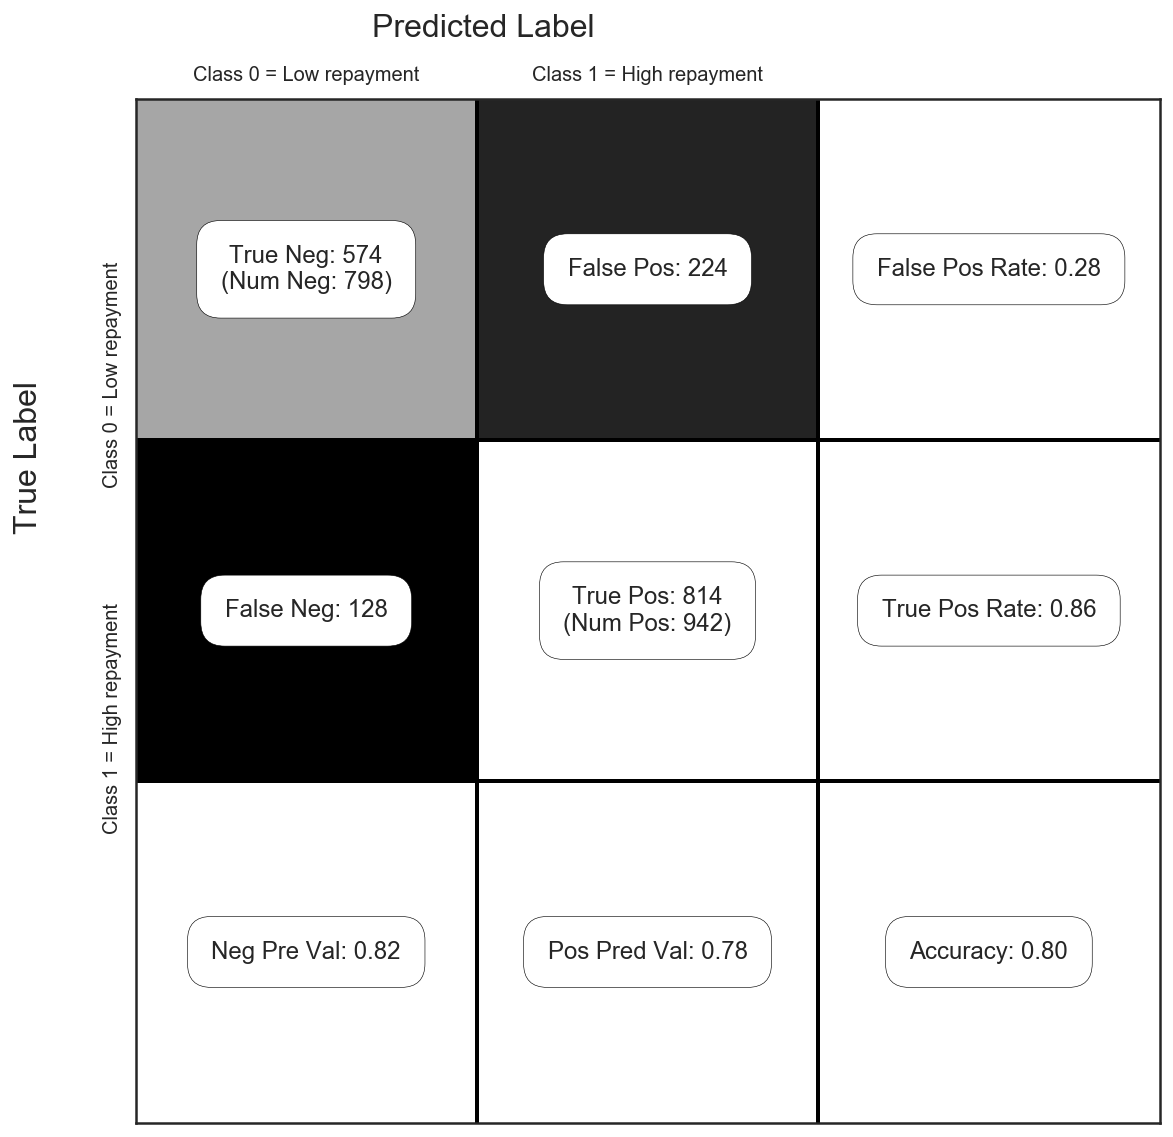

In [49]:
from confussion import show_confusion_matrix
C = confusion_matrix(y_test, estimator.predict(X_test))
show_confusion_matrix(C, ['Class 0 = Low repayment', 'Class 1 = High repayment'])

We have an accuracy score of 80% in the prediction, which is not perfect but good. 